# Gossip spread

We use different models to measure the spread of gossip and see at any time, the worst case spread of the news.

Gossip spread can be modelled using a multitude of models like Lotka Volterra, Exponential growth and so on. Since we have covered those models in other notebooks, we will cover a new model, namely the SIR model

In this model we assume gossip spread to be akin to an epidemic spread. This model compartmentalizes the population into three groups, namely Susceptible, Infected, and Recovered. It then tries to measure migration between the groups.

The simplest of these models is the [Kermack McKendrick model](http://mathworld.wolfram.com/Kermack-McKendrickModel.html).

In [1]:
from scipy.integrate import odeint
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.ion()
plt.rcParams['figure.figsize'] = 7, 5

P = 0           # birth rate
d = 0.0001  # natural disinterested percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

In [7]:
# solve the system dy/dt = f(y, t)
def f(y, t):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    # the model equations (see Munz et al. 2009)
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    return [f0, f1, f2]

# initial conditions
S0 = 500.                   # initial population
Z0 = 0                      # initial Gossip population
R0 = 0                      # initial disinterested population
y0 = [S0, Z0, R0]   # initial condition vector
t  = np.linspace(0, 10., 1500)       # time grid

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

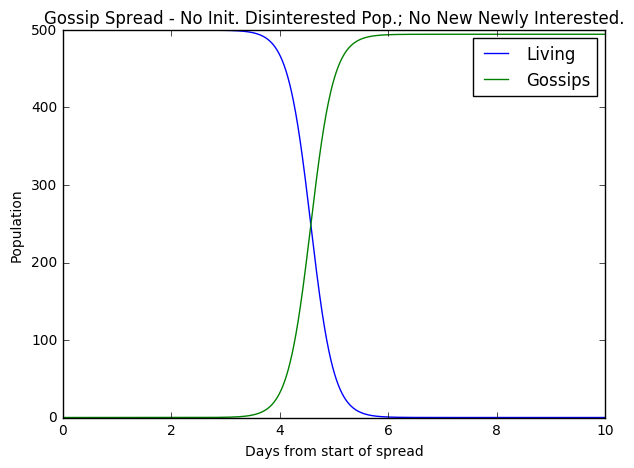

In [8]:
# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Gossips')
plt.xlabel('Days from start of spread')
plt.ylabel('Population')
plt.title('Gossip Spread - No Init. Disinterested Pop.; No New Newly Interested.')
plt.legend(loc=0)

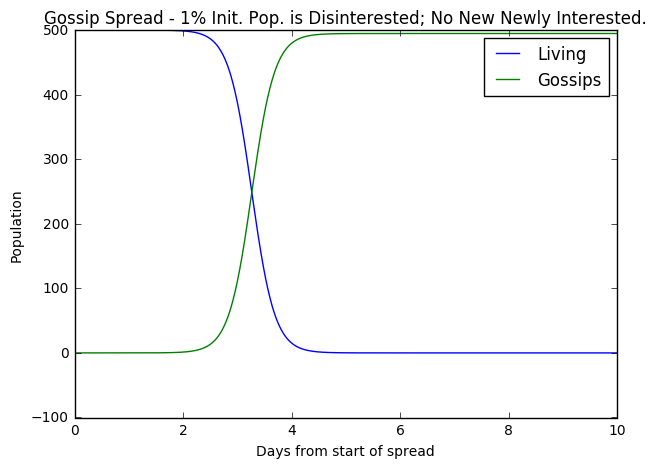

In [9]:
# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is Disinterested
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Gossips')
plt.xlabel('Days from start of spread')
plt.ylabel('Population')
plt.title('Gossip Spread - 1% Init. Pop. is Disinterested; No New Newly Interested.')
plt.legend(loc=0)

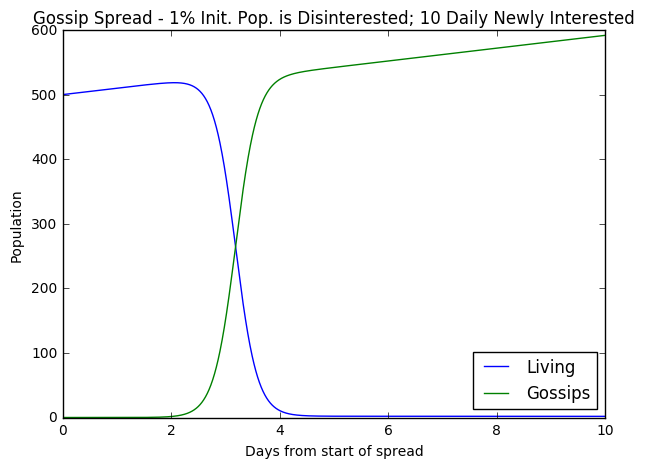

In [10]:
# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is Disinterested
P  = 10        # 10 new Newly Interested daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Gossips')
plt.xlabel('Days from start of spread')
plt.ylabel('Population')
plt.title('Gossip Spread - 1% Init. Pop. is Disinterested; 10 Daily Newly Interested')
plt.legend(loc=0)

Thus we model gossip spread in a population using the SIR model.